1. By first order condition, it is equivalent to $x$ is feasible and for all feasible $y$, 
$$
\nabla f(x)^\top (y-x)\ge 0.
$$
Notice if we pick $y = [0, \cdots, 0, 1_i, 0, \cdots, 0]$, where $i$ is the index of minimum component of $\nabla f(x)$, then 
$$
\nabla f(x)_i \ge \nabla f(x)^\top x.
$$
On the other hand, if
$$
\min_i\nabla f(x)_i\ge\nabla f(x)^\top x,
$$
then for each feasible $y$, 
$$
\nabla f(x)^\top y = \sum_{i=1}^{n}\nabla f(x)_iy_i \ge \sum_{i=1}^{n}\min_j\nabla f(x)_j y_i = \min_j\nabla f(x)_j \ge \nabla f(x)^\top x.
$$

2.  
    (a)  For $l_2$ norm, let $z = (Re(x), Im(x))$, then $\lVert z\rVert_2 = \lVert x\rVert_2$. Notice $Ax = b$ is equivalent to
    $$\left[
    \begin{aligned}
    &Re(A) &-Im(A) \\
    &Im(A) &Re(A)
    \end{aligned}\right]
    z = \left[
    \begin{aligned}
    &Re(b)\\ 
    &Im(b)
    \end{aligned}\right]
    $$
    So the problem becomes a real-valued problem
    $$
    \begin{aligned}
    \text{minimize}\ &\lVert z\rVert_2 \\
    \text{subject to}\ &A^*z = b^*.
    \end{aligned}
    $$
    (b) Using the variable $z$ from (a), the problem can be written as 
    $$
    \begin{aligned}
    \text{minimize}\ & t\\
    \text{subject to}\ &\left\lVert \begin{aligned} &z_i \\ &z_{n+i}\end{aligned} \right\rVert_2 \le t, i = 1, 2, \cdots, n\\
    &A^*z = b^*.
    \end{aligned}
    $$
    
    (c) First we consider the analytic solution to (a). Consider an equivalent problem $f(x) = \lVert x\rVert_2^2$, the Lagrangian is
    $$
    L(x, \lambda) = \lVert x\rVert_2^2 + \lambda^\top(Ax-b).
    $$
    Hence we have
    $$
    \frac{\partial f}{\partial x} = 2x+A^\top\lambda,
    $$
    with root $x = -\frac{1}{2}A^\top\lambda$. Then
    $$
    g(\lambda) = \frac{1}{4}\lVert A^\top\lambda\rVert_2^2-\frac{1}{2}\lambda^\top AA^\top\lambda-\lambda^\top b,
    $$
    and
    $$
    \frac{\partial g}{\partial\lambda} = \frac{1}{2}AA^\top\lambda - \frac{1}{2}(AA^\top+AA^\top)\lambda-b,
    $$
    with root $\lambda = -2(AA^\top)^{-1}b$. Hence the minimizer $x = A^\top(AA^\top)^{-1}b$.
    

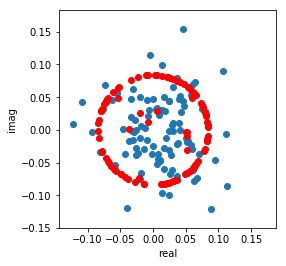

In [22]:
# 2.(c)
import cvxpy as cvx
import numpy as np

m = 30
n = 100
A_re = np.random.random((m, n))
A_im = np.random.random((m, n))
b_re = np.random.random((m, 1))
b_im = np.random.random((m, 1))

A = np.concatenate([np.concatenate([A_re, -A_im], axis = 1), np.concatenate([A_im, A_re], axis = 1)], axis = 0)
b = np.concatenate([b_re, b_im], axis = 0)

A_ = A_re+1j*A_im
b_ = b_re+1j*b_im

### For (a)
xa = A.T.dot(np.linalg.inv(A.dot(A.T))).dot(b)

### For (b, 2-norm)
x1 = cvx.Variable((100, 1), complex = True)
prob = cvx.Problem(cvx.Minimize(cvx.norm(x1)), 
                  [A_*x1 == b_])
prob.solve()

### For (b, inf-norm)
x2 = cvx.Variable((100, 1), complex = True)
prob2 = cvx.Problem(cvx.Minimize(cvx.norm_inf(x2)),
                   [A_*x2 == b_])
prob2.solve(solver = cvx.SCS)

from matplotlib import pyplot as plt
plt.scatter(np.real(x1.value), np.imag(x1.value))
plt.scatter(np.real(x2.value), np.imag(x2.value), c = 'r')
plt.xlabel('real')
plt.ylabel('imag')
plt.axis('square')
plt.show()

In [36]:
# 3.(a)

x = cvx.Variable((2, 1))
P = np.asarray([[1, -1/2], [-1/2, 2]])
c = np.asarray([[-1], [0]])
A = np.asarray([[1, 2], [1, -4], [5, 76]])
b = np.asarray([[-2], [-3], [1]])
constraints = [A*x <= b]
prob = cvx.Problem(cvx.Minimize(cvx.quad_form(x, P)+c.T*x),
                  constraints)
prob.solve()
print("optimal primal variable:\n", x.value)
print("optimal dual variable:\n", constraints[0].dual_value)

""""
The KKT conditions are:
    1. Primal constraints: 
        x_1+2x_2<=u_1,
        x_1-4x_2<=u_2,
        5x_1+76x_2<=1
    2. dual constraints:
        lambda_i >= 0
    3. complementary slackness:
        lambda_i*f_i(x) = 0
    4. gradient of lagrangian w.r.t. x:
        2x_1-x_2-1+lambda_1+lambda_2+5lambda_3 = 0,
        4x_2-x_1+2lambda_1-4lambda_2+76lambda_3 = 0.
        
Since lambda_1 < 0, the KKT conditions are not satisfied.
"""

optimal primal variable:
 [[-2.33333333]
 [ 0.16666667]]
optimal dual variable:
 [[-4.83333333]
 [ 3.        ]
 [ 2.54919461]]


'"\nThe KKT conditions are:\n    1. Primal constraints: \n        x_1+2x_2<=u_1,\n        x_1-4x_2<=u_2,\n        5x_1+76x_2<=1\n    2. dual constraints:\n        lambda_i >= 0\n    3. complementary slackness:\n        lambda_i*f_i(x) = 0\n    4. gradient of lagrangian w.r.t. x:\n        2x_1-x_2-1+lambda_1+lambda_2+5lambda_3 = 0,\n        4x_2-x_1+2lambda_1-4lambda_2+76lambda_3 = 0.\n        \nSince lambda_1 < 0, the KKT conditions are not satisfied.\n'